# **Setup**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

In [48]:
df = pd.read_csv('../data/CleanedCoffeeData.csv');
df.head(1)

,ID,Name,Type,Serving,Serving Size,Headline,Intensity,Sleeve Price,Per Capsule Price,Caption,...,Roast Type,Intensity Classification,Acidity Classification,Bitterness Classification,Roastness Classification,Body Classification,Milky Taste Classification,Bitterness with Milk Classification,Roastiness with Milk Classification,Creamy Texture Classification
0,VL01,Intenso,Vertuo,Coffee,230ml,Smooth & Strong,9.0,12.6,1.26,Why we love it: Try Intenso - a Vertuo coffee ...,...,Dark,High,Low,High,High,Medium,Medium,Medium,Medium,Medium


# **Take a Peek of the Data**

In [49]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       70 non-null     object 
 1   Name                                     70 non-null     object 
 2   Type                                     70 non-null     object 
 3   Serving                                  70 non-null     object 
 4   Serving Size                             70 non-null     object 
 5   Headline                                 70 non-null     object 
 6   Intensity                                70 non-null     float64
 7   Sleeve Price                             70 non-null     float64
 8   Per Capsule Price                        70 non-null     float64
 9   Caption                                  70 non-null     object 
 10  Taste                                    70 non-null

In [50]:
# Summary Statistics
df.describe()

,Intensity,Sleeve Price,Per Capsule Price,Acidity,Bitterness,Roastness,Body,Milky Taste,Bitterness with Milk,Roastiness with Milk,Creamy Texture,Number of Capsules per Sleeve
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.00000,70.000000
mean,6.985714,10.338571,1.047571,2.028571,2.828571,3.071429,2.828571,2.785714,2.785714,2.871429,2.90000,9.914286
std,2.268198,1.486392,0.176006,1.102979,1.089760,1.053929,1.006809,0.699749,0.740013,0.536263,0.42221,0.503405
min,2.000000,8.700000,0.870000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,7.000000
25%,6.000000,9.200000,0.920000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.00000,10.000000
50%,6.000000,9.800000,0.980000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,10.000000
75%,8.000000,11.150000,1.182500,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.00000,10.000000
max,13.000000,13.700000,1.600000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.00000,10.000000


In [51]:
# Numerical columns
df.select_dtypes(np.number).columns

Index(['Intensity', 'Sleeve Price', 'Per Capsule Price', 'Acidity',
       'Bitterness', 'Roastness', 'Body', 'Milky Taste',
       'Bitterness with Milk', 'Roastiness with Milk', 'Creamy Texture',
       'Number of Capsules per Sleeve'],
      dtype='object')

In [52]:
# Non-Numerical columns
df.select_dtypes('object').columns

Index(['ID', 'Name', 'Type', 'Serving', 'Serving Size', 'Headline', 'Caption',
       'Taste', 'Best Served As', 'Notes', 'Ingredients & Allergens',
       'Net Weight per Total Number of Capsules', 'Capsule Image Link',
       'Capsule & Sleeve Image Link', 'Decaf Coffee?', 'Category',
       'Other Information', 'Status', 'Roast Type', 'Intensity Classification',
       'Acidity Classification', 'Bitterness Classification',
       'Roastness Classification', 'Body Classification',
       'Milky Taste Classification', 'Bitterness with Milk Classification',
       'Roastiness with Milk Classification', 'Creamy Texture Classification'],
      dtype='object')

# **Exploratory Data Analysis**

## Univariate Analysis

Type
Original    35
Vertuo      35
Name: ID, dtype: int64


([<matplotlib.patches.Wedge at 0x1b78444fbe0>,
 [Text(6.735557395310444e-17, 1.1, 'Original'),
  Text(-2.0206672185931328e-16, -1.1, 'Vertuo')],
 [Text(3.6739403974420595e-17, 0.6, '50%'),
  Text(-1.1021821192326178e-16, -0.6, '50%')])

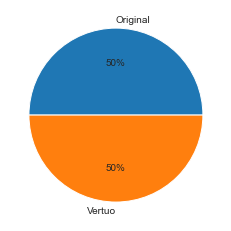

In [53]:
# Pie Chart showing the number of coffees per machine type
print(df.groupby(by='Type')['ID'].count());
def chart_numCoffeesPerMachineType(dataframe):
    chart = plt.pie(dataframe, labels = dataframe.index, autopct='%.0f%%');
    return chart;

chart_numCoffeesPerMachineType(dataframe=df.groupby(by='Type')['ID'].count())

Serving
Carafe              2
Coffee             14
Double Espresso     4
Espresso           32
Gran Lungo          6
Lungo              12
Name: ID, dtype: int64


<AxesSubplot:title={'center':'Distribution of Serving Sizes'}, xlabel='Serving', ylabel='Count'>

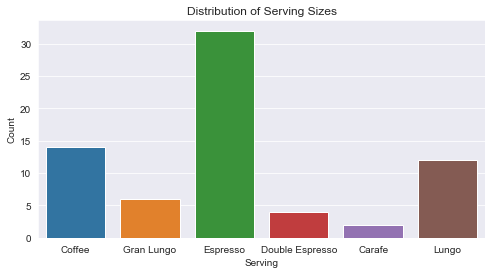

In [54]:
# Bar chart assessing the distribution of serving sizes
print(df.groupby(by=['Serving'])['ID'].count());
def chart_numCoffeesPerColumn(dataframe, column, title):
    fig, ax = plt.subplots(figsize=(8,4));
    ax = sns.countplot(data=dataframe, x=column);
    ax.set(ylabel='Count', title=title);
    return ax;

chart_numCoffeesPerColumn(
    dataframe=df,
    column='Serving',
    title='Distribution of Serving Sizes'
)

In [55]:
print(df.groupby(by=['Serving']).size())
px.bar(df.groupby(by=['Serving'])['ID'].count(), x=df.groupby(by=['Serving'])['ID'].count().index, y=df.groupby(by=['Serving'])['ID'].count().values)

Serving
Carafe              2
Coffee             14
Double Espresso     4
Espresso           32
Gran Lungo          6
Lungo              12
dtype: int64


Serving          Type    
Carafe           Vertuo       2
Coffee           Vertuo      14
Double Espresso  Vertuo       4
Espresso         Original    23
                 Vertuo       9
Gran Lungo       Vertuo       6
Lungo            Original    12
Name: ID, dtype: int64


<AxesSubplot:title={'center':'Distribution of Serving by Machine Type'}, xlabel='Count', ylabel='Serving'>

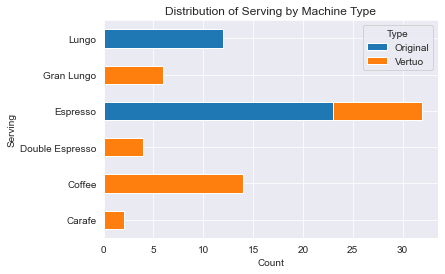

In [56]:
# Side by Side horizontal bar chart showing serving size distribution by machine type
print(df.groupby(by=['Serving','Type'])['ID'].count())
def chart_numCoffeesPerMachineTypeAndColumn(dataframe, column1, column2, type):
    if type == 'stacked':
        chart = df.groupby(by=[column1,column2]).size().unstack().plot(kind='barh', stacked=True);
    else:
        chart = df.groupby(by=[column1])[column2].value_counts().unstack().plot(kind='barh');
    chart.set_title(f'Distribution of {column1} by Machine {column2}');
    chart.set_xlabel('Count');
    return chart;

chart_numCoffeesPerMachineTypeAndColumn(dataframe=df, column1='Serving', column2='Type', type='stacked')

In [58]:
df_temp1 = df.groupby(by=['Serving','Type']).size();
data = [];
for i in range(len(df_temp1)):
    row = []
    for j in range(len(df_temp1.index[i])):
        row.append(df_temp1.index[i][j]);
    row.append(df_temp1.values[i]);
    data.append(row);
df_temp2 = pd.DataFrame(data, columns=['Serving','Type','Count'])
df_temp2

,Serving,Type,Count
0,Carafe,Vertuo,2
1,Coffee,Vertuo,14
2,Double Espresso,Vertuo,4
3,Espresso,Original,23
4,Espresso,Vertuo,9
5,Gran Lungo,Vertuo,6
6,Lungo,Original,12


In [59]:
px.bar(
    df_temp2, 
    x='Serving', 
    y='Count',
    color='Type',
    barmode='group'
)

<AxesSubplot:title={'center':'Distribution of Serving by Machine Type'}, xlabel='Count', ylabel='Serving'>

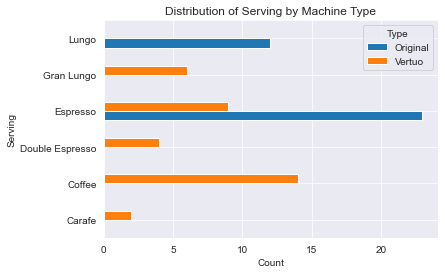

In [60]:
# Stacked horizontal bar chart showing serving size distribution by machine type
chart_numCoffeesPerMachineTypeAndColumn(dataframe=df, column1='Serving', column2='Type', type=None)

Sleeve Price  Type    
8.7           Original    15
9.2           Original     8
9.7           Original    12
9.9           Vertuo       8
10.8          Vertuo       1
11.0          Vertuo       8
11.2          Vertuo       2
12.1          Vertuo       2
12.6          Vertuo      12
13.7          Vertuo       2
Name: ID, dtype: int64


(<AxesSubplot:title={'center':'Overall'}, xlabel='Sleeve Price ($)'>,
 <AxesSubplot:title={'center':'Original'}, xlabel='Sleeve Price ($)'>,
 <AxesSubplot:title={'center':'Vertuo'}, xlabel='Sleeve Price ($)'>)

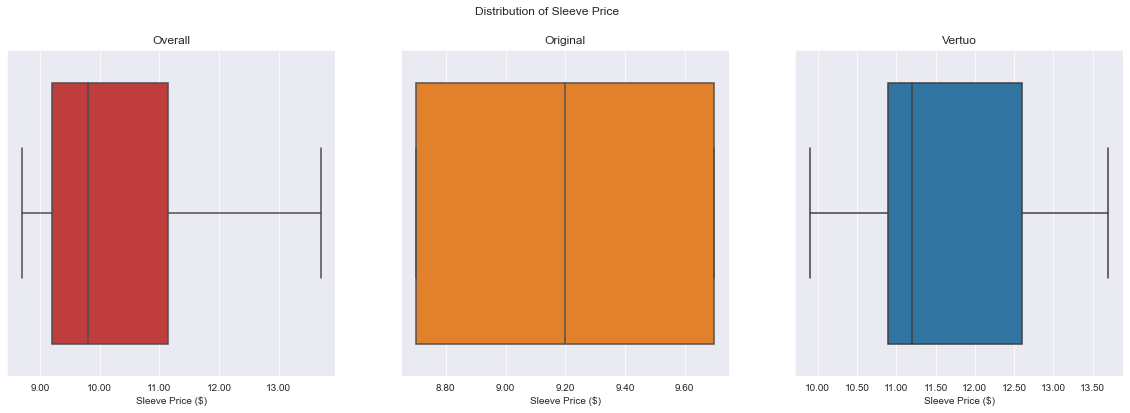

In [61]:
# Boxplots showing the distribution of sleeve price overall as well as per machine type
print(df.groupby(by=['Sleeve Price','Type'])['ID'].count());
def chart_sleevePerCapsuleMachineType(dataframe, column):
    fig = plt.figure(figsize=(20,6));
    ax1 = fig.add_subplot(1,3,1);
    ax2 = fig.add_subplot(1,3,2);
    ax3 = fig.add_subplot(1,3,3);

    fig.suptitle(f'Distribution of {column}');
    
    sns.boxplot(ax=ax1, x=dataframe[column], color=sns.color_palette()[3]);
    ax1.set_title('Overall');
    ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'));
    ax1.set_xlabel(f'{column} ($)');
    
    sns.boxplot(ax=ax2, x=dataframe[dataframe['Type'] == 'Original'][column], color=sns.color_palette()[1]);
    ax2.set_title(f'Original')
    ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'));
    ax2.set_xlabel(f'{column} ($)');

    sns.boxplot(ax=ax3, x=dataframe[dataframe['Type'] == 'Vertuo'][column], color=sns.color_palette()[0]);
    ax3.set_title(f'Vertuo');
    ax3.xaxis.set_major_formatter(FormatStrFormatter('%.2f'));
    ax3.set_xlabel(f'{column} ($)');

    return ax1, ax2, ax3;

chart_sleevePerCapsuleMachineType(dataframe=df, column='Sleeve Price')

Per Capsule Price  Type    
0.87               Original    15
0.92               Original     8
0.97               Original    12
0.99               Vertuo       8
1.08               Vertuo       1
1.10               Vertuo       8
1.21               Vertuo       2
1.26               Vertuo      12
1.37               Vertuo       2
1.60               Vertuo       2
Name: ID, dtype: int64


(<AxesSubplot:title={'center':'Overall'}, xlabel='Per Capsule Price ($)'>,
 <AxesSubplot:title={'center':'Original'}, xlabel='Per Capsule Price ($)'>,
 <AxesSubplot:title={'center':'Vertuo'}, xlabel='Per Capsule Price ($)'>)

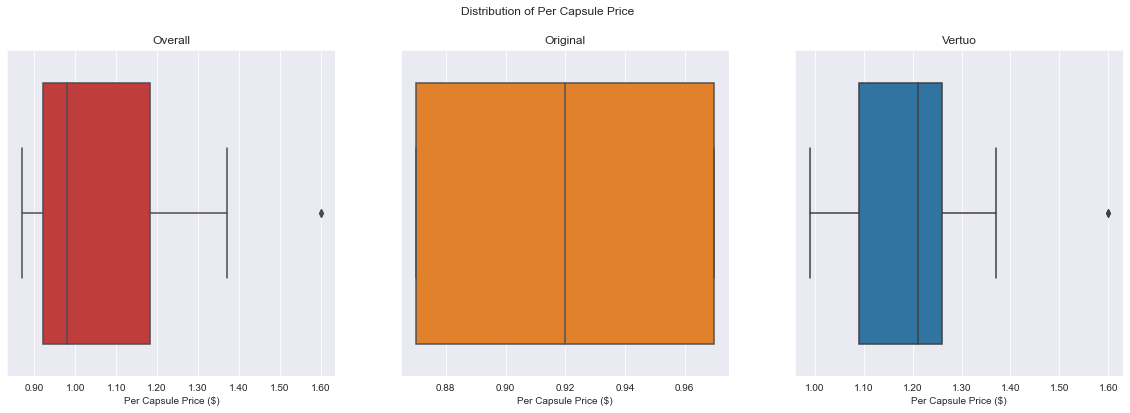

In [62]:
# Boxplots showing the distribution of per capsule price overall as well as per machine type
print(df.groupby(by=['Per Capsule Price','Type'])['ID'].count());
chart_sleevePerCapsuleMachineType(dataframe=df, column='Per Capsule Price')

(<AxesSubplot:xlabel='Sleeve Price ($)', ylabel='count'>,
 <AxesSubplot:xlabel='Per Capsule Price ($)', ylabel='count'>)

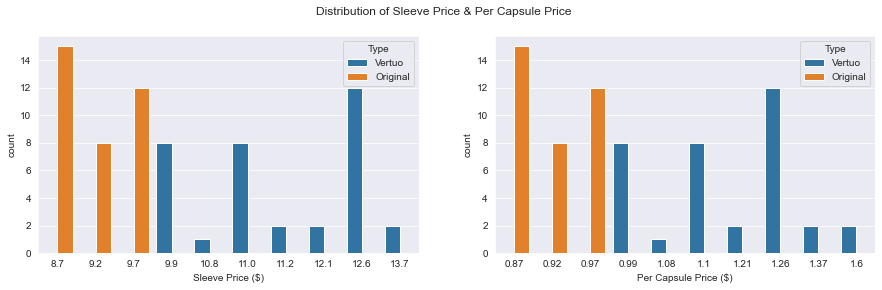

In [63]:
# Count Plot of the number of coffees based on sleeve price & per capsule price overall and by machine type
def chart_numCoffeesSleeveCapsuleMachineType(dataframe, column1, column2):
    fig = plt.figure(figsize=(15,4));
    ax1 = fig.add_subplot(1,2,1);
    ax2 = fig.add_subplot(1,2,2);
    fig.suptitle(f'Distribution of {column1} & {column2}');
    sns.countplot(ax=ax1, data=dataframe, x=column1, hue='Type');
    ax1.set_xlabel(f'{column1} ($)');
    # ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'));
    sns.countplot(ax=ax2, data=dataframe, x=column2, hue='Type');
    ax2.set_xlabel(f'{column2} ($)');
    # ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'));
    return ax1, ax2;

chart_numCoffeesSleeveCapsuleMachineType(dataframe=df, column1='Sleeve Price', column2='Per Capsule Price')

In [73]:
df_temp1 = df.groupby(by=['Sleeve Price','Type']).size();
data = [];
for i in range(len(df_temp1)):
    row = []
    for j in range(len(df_temp1.index[i])):
        row.append(str(df_temp1.index[i][j]));
    row.append(df_temp1.values[i]);
    data.append(row);
df_temp2 = pd.DataFrame(data, columns=['Sleeve Price','Type','Count'])
df_temp2

,Sleeve Price,Type,Count
0,8.7,Original,15
1,9.2,Original,8
2,9.7,Original,12
3,9.9,Vertuo,8
4,10.8,Vertuo,1
5,11.0,Vertuo,8
6,11.2,Vertuo,2
7,12.1,Vertuo,2
8,12.6,Vertuo,12
9,13.7,Vertuo,2


In [74]:
fig = px.bar(
    df_temp2,
    x='Sleeve Price',
    y='Count',
    color='Type'
)

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = df_temp2['Sleeve Price'],
        ticktext = df_temp2['Sleeve Price']
    )
)
fig.show()

In [82]:
df_temp1 = df.groupby(by=['Sleeve Price']).size();
df_temp1 = df_temp1.sort_index()
df_temp1.index = df_temp1.index.astype(str);
df_temp1

Sleeve Price
8.7     15
9.2      8
9.7     12
9.9      8
10.8     1
11.0     8
11.2     2
12.1     2
12.6    12
13.7     2
dtype: int64

<AxesSubplot:title={'center':'Distribution of Intensity'}, xlabel='Intensity', ylabel='Count'>

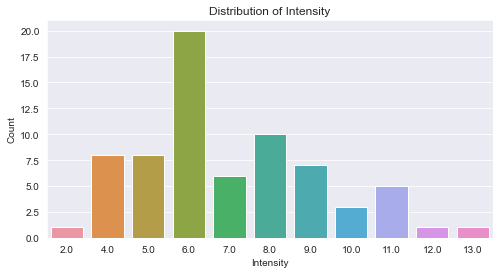

In [15]:
# Bar plot showing distribution of intensity levels
chart_numCoffeesPerColumn(
    dataframe=df,
    column='Intensity',
    title='Distribution of Intensity'
)

In [100]:
df_temp1 = df.groupby(by=['Intensity','Type']).size();
data = [];
for i in range(len(df_temp1)):
    row = []
    for j in range(len(df_temp1.index[i])):
        row.append(str(df_temp1.index[i][j]));
    row.append(df_temp1.values[i]);
    data.append(row);
df_temp2 = pd.DataFrame(data, columns=['Intensity','Type','Count'])
df_temp2

,Intensity,Type,Count
0,2.0,Vertuo,1
1,4.0,Original,5
2,4.0,Vertuo,3
3,5.0,Original,3
4,5.0,Vertuo,5
5,6.0,Original,10
6,6.0,Vertuo,10
7,7.0,Vertuo,6
8,8.0,Original,6
9,8.0,Vertuo,4


In [98]:
# 'stack', 'group', 'overlay', 'relative'
fig = px.bar(
    df_temp2,
    x='Intensity',
    y='Count',
    color='Type',
    barmode='stack'
)
fig.show()

array([[<AxesSubplot:xlabel='Acidity', ylabel='count'>,
        <AxesSubplot:xlabel='Bitterness', ylabel='count'>],
       [<AxesSubplot:xlabel='Body', ylabel='count'>,
        <AxesSubplot:xlabel='Roastness', ylabel='count'>]], dtype=object)

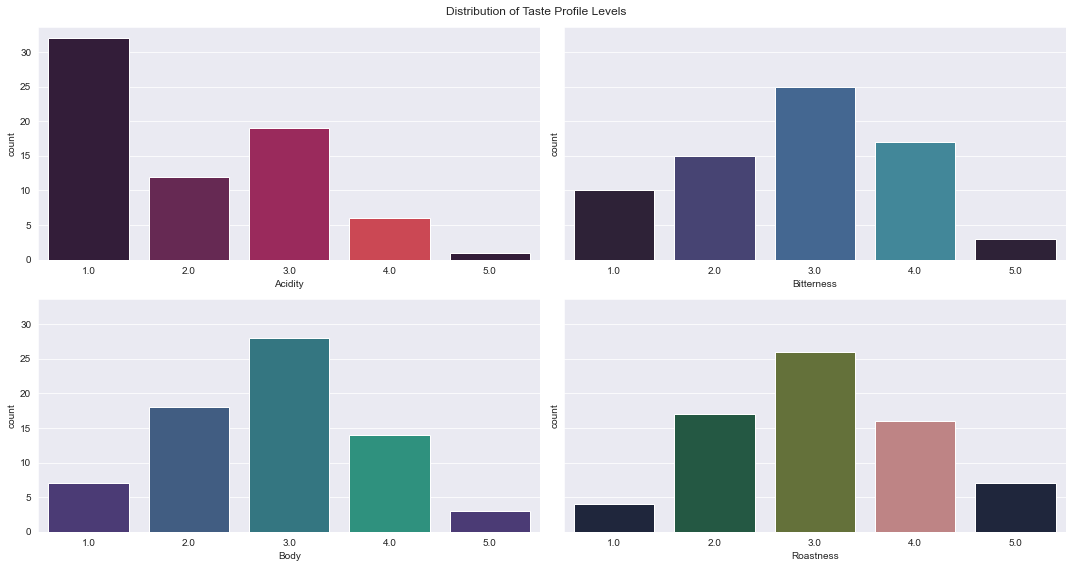

In [16]:
# Bar plot of taste profile level distribution
def charts_tasteProfileLevels(dataframe, columns, title, palettes):
    fig, axes = plt.subplots(2, 2, figsize=(15,8), sharey='all');
    fig.suptitle(title);
    limit = len(dataframe[columns[0]].unique()) - 1;
    sns.countplot(ax=axes[0, 0], data=dataframe, x=columns[0], palette=palettes[0][0:limit]);
    sns.countplot(ax=axes[0, 1], data=dataframe, x=columns[1], palette=palettes[1][0:limit]);
    sns.countplot(ax=axes[1, 0], data=dataframe, x=columns[2], palette=palettes[2][0:limit]);
    sns.countplot(ax=axes[1, 1], data=dataframe, x=columns[3], palette=palettes[3][0:limit]);
    plt.tight_layout();
    return axes;

charts_tasteProfileLevels(
    dataframe=df, 
    columns=['Acidity','Bitterness','Body','Roastness'], 
    title='Distribution of Taste Profile Levels',
    palettes=[
        sns.color_palette('rocket'),
        sns.color_palette("mako"),
        sns.color_palette('viridis'),
        sns.color_palette('cubehelix')
    ]
)

array([[<AxesSubplot:xlabel='Milky Taste', ylabel='count'>,
        <AxesSubplot:xlabel='Bitterness with Milk', ylabel='count'>],
       [<AxesSubplot:xlabel='Roastiness with Milk', ylabel='count'>,
        <AxesSubplot:xlabel='Creamy Texture', ylabel='count'>]],
      dtype=object)

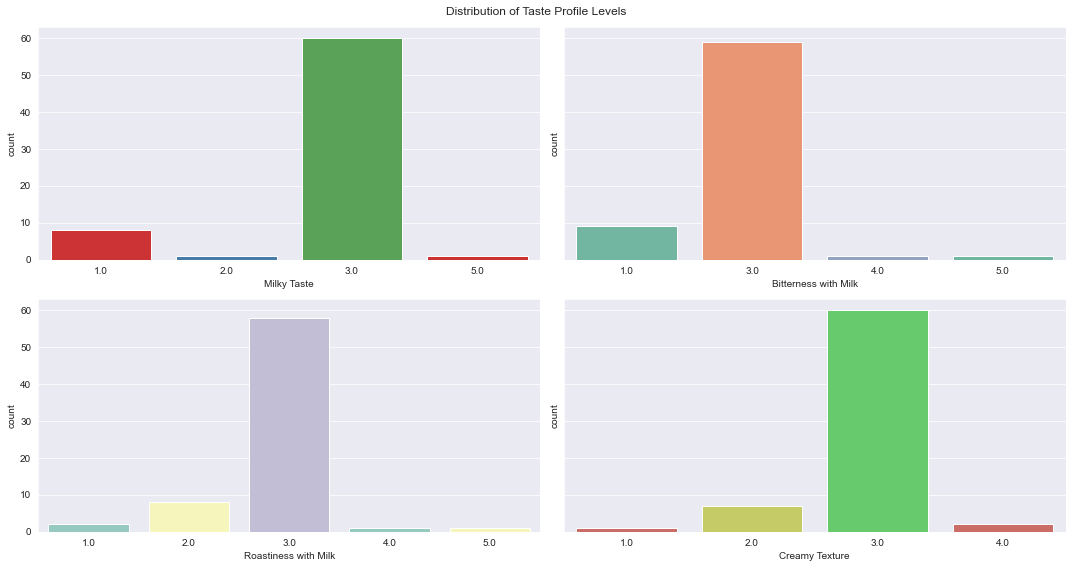

In [17]:
# Bar plot of taste profile level with milk distribution
charts_tasteProfileLevels(
    dataframe=df, 
    columns=['Milky Taste','Bitterness with Milk','Roastiness with Milk','Creamy Texture'], 
    title='Distribution of Taste Profile Levels',
    palettes=[
        sns.color_palette('Set1'),
        sns.color_palette("Set2"),
        sns.color_palette('Set3'),
        sns.color_palette('hls')
    ]
)

<AxesSubplot:title={'center':'Distribution of Roast Type by Machine Type'}, xlabel='Count', ylabel='Roast Type'>

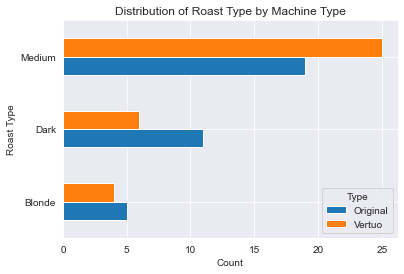

In [18]:
# Side by side horizontal bar chart of number of coffees per roast type and machine type
chart_numCoffeesPerMachineTypeAndColumn(dataframe=df, column1='Roast Type', column2='Type', type=None)

([<matplotlib.patches.Wedge at 0x213e8de9060>,
 [Text(-1.0603591514624071, 0.29264051310425915, 'No'),
  Text(1.0603591583121525, -0.2926404882847618, 'Yes')],
 [Text(-0.5783777189794947, 0.1596220980568686, '91%'),
  Text(0.5783777227157195, -0.15962208451896098, '9%')])

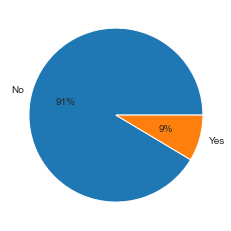

In [19]:
# Pie chart showing proportion of caffenated to decaf coffee
chart_numCoffeesPerMachineType(dataframe=df.groupby(by='Decaf Coffee?')['ID'].count())

array([[<AxesSubplot:xlabel='Acidity Classification', ylabel='count'>,
        <AxesSubplot:xlabel='Bitterness Classification', ylabel='count'>],
       [<AxesSubplot:xlabel='Body Classification', ylabel='count'>,
        <AxesSubplot:xlabel='Roastness Classification', ylabel='count'>]],
      dtype=object)

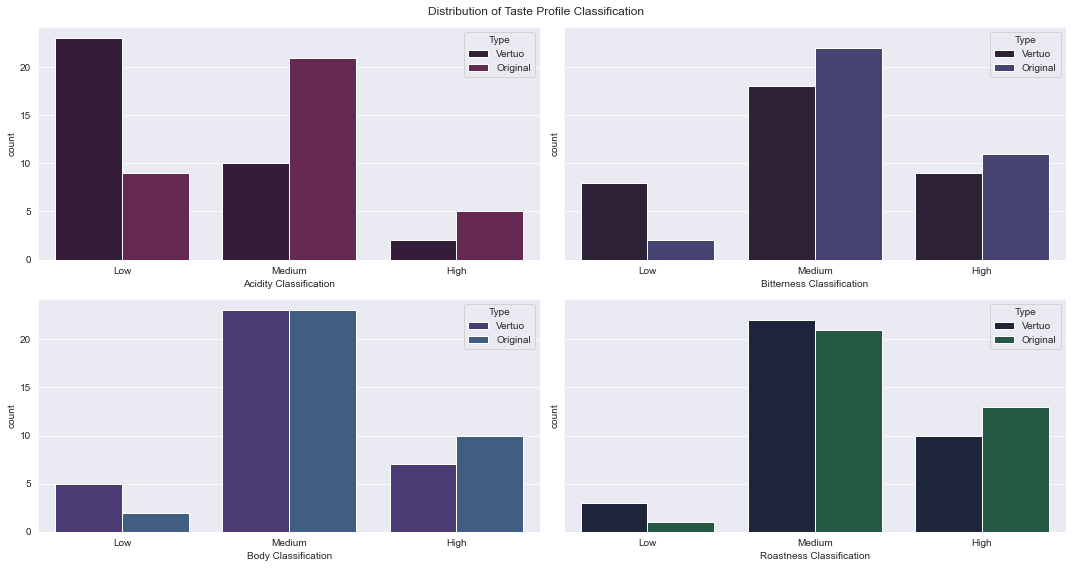

In [20]:
# Distribution of Taste profile classification by machine type
def charts_tasteProfileLevelsMachineType(dataframe, columns, title, palettes):
    fig, axes = plt.subplots(2, 2, figsize=(15,8), sharey='all');
    fig.suptitle(title);
    limit = len(dataframe[columns[0]].unique()) - 1;
    sns.countplot(ax=axes[0, 0], data=dataframe, x=columns[0], hue='Type', palette=palettes[0][0:limit], order=["Low", "Medium", "High"]);
    sns.countplot(ax=axes[0, 1], data=dataframe, x=columns[1], hue='Type', palette=palettes[1][0:limit], order=["Low", "Medium", "High"]);
    sns.countplot(ax=axes[1, 0], data=dataframe, x=columns[2], hue='Type', palette=palettes[2][0:limit], order=["Low", "Medium", "High"]);
    sns.countplot(ax=axes[1, 1], data=dataframe, x=columns[3], hue='Type', palette=palettes[3][0:limit], order=["Low", "Medium", "High"]);
    plt.tight_layout();
    return axes;

charts_tasteProfileLevelsMachineType(
    dataframe=df, 
    columns=['Acidity Classification','Bitterness Classification','Body Classification','Roastness Classification'], 
    title='Distribution of Taste Profile Classification',
    palettes=[
        sns.color_palette('rocket'),
        sns.color_palette("mako"),
        sns.color_palette('viridis'),
        sns.color_palette('cubehelix')
    ]
)

array([[<AxesSubplot:xlabel='Acidity Classification', ylabel='count'>,
        <AxesSubplot:xlabel='Bitterness Classification', ylabel='count'>],
       [<AxesSubplot:xlabel='Body Classification', ylabel='count'>,
        <AxesSubplot:xlabel='Roastness Classification', ylabel='count'>]],
      dtype=object)

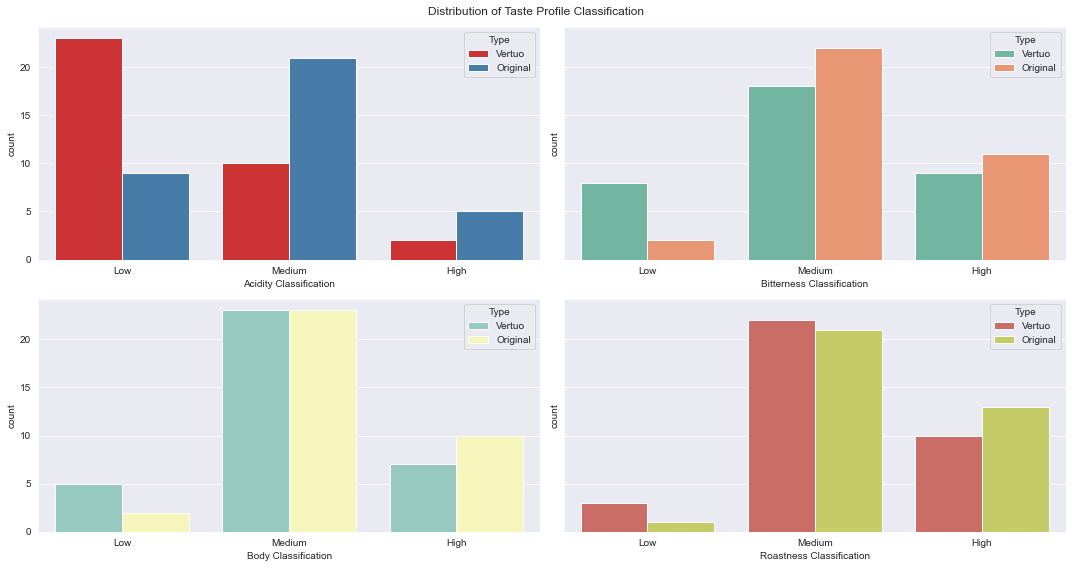

In [21]:
# Distribution of Taste profile with milk classification by machine type
charts_tasteProfileLevelsMachineType(
    dataframe=df, 
    columns=['Acidity Classification','Bitterness Classification','Body Classification','Roastness Classification'], 
    title='Distribution of Taste Profile Classification',
    palettes=[
        sns.color_palette('Set1'),
        sns.color_palette("Set2"),
        sns.color_palette('Set3'),
        sns.color_palette('hls')
    ]
)

## Multivariate Analysis

In [22]:
# Correlation Dataframe regarding Taste Profile against Intensity
df[['Intensity','Acidity','Bitterness','Body','Roastness']].corr().style.background_gradient(cmap='Blues', axis=None)

,Intensity,Acidity,Bitterness,Body,Roastness
Intensity,1.000000,-0.382172,0.772945,0.576428,0.746133
Acidity,-0.382172,1.000000,-0.128497,-0.217389,-0.350865
Bitterness,0.772945,-0.128497,1.000000,0.646490,0.843639
Body,0.576428,-0.217389,0.646490,1.000000,0.639983
Roastness,0.746133,-0.350865,0.843639,0.639983,1.000000


<AxesSubplot:>

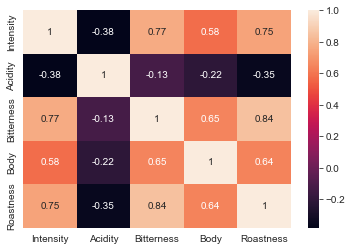

In [25]:
# Correlation heat map regarding Taste Profile against Intensity
def chart_correlationIntensityTasteProfile(dataframe, columns):
    chart = sns.heatmap(dataframe[columns].corr(), annot=True);
    return chart;

chart_correlationIntensityTasteProfile(dataframe=df, columns=['Intensity','Acidity','Bitterness','Body','Roastness'])

In [74]:
# Correlation Dataframe regarding Taste Profile with Milk against Intensity
df[['Intensity','Milky Taste','Bitterness with Milk','Roastiness with Milk','Creamy Texture']].corr().style.background_gradient(cmap='Blues', axis=None)

,Intensity,Milky Taste,Bitterness with Milk,Roastiness with Milk,Creamy Texture
Intensity,1.000000,0.034568,0.222643,0.212937,-0.031781
Milky Taste,0.034568,1.000000,0.441808,0.118624,0.858458
Bitterness with Milk,0.222643,0.441808,1.000000,0.915616,0.347892
Roastiness with Milk,0.212937,0.118624,0.915616,1.000000,0.070411
Creamy Texture,-0.031781,0.858458,0.347892,0.070411,1.000000


<AxesSubplot:>

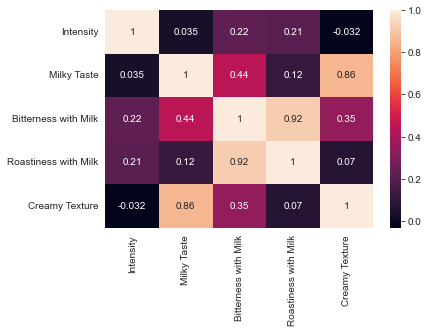

In [26]:
# Correlation heat map regarding Taste Profile with Milk against Intensity
chart_correlationIntensityTasteProfile(dataframe=df, columns=['Intensity','Milky Taste','Bitterness with Milk','Roastiness with Milk','Creamy Texture'])

array([[<AxesSubplot:xlabel='Acidity', ylabel='Intensity'>,
        <AxesSubplot:xlabel='Bitterness', ylabel='Intensity'>],
       [<AxesSubplot:xlabel='Body', ylabel='Intensity'>,
        <AxesSubplot:xlabel='Roastness', ylabel='Intensity'>]],
      dtype=object)

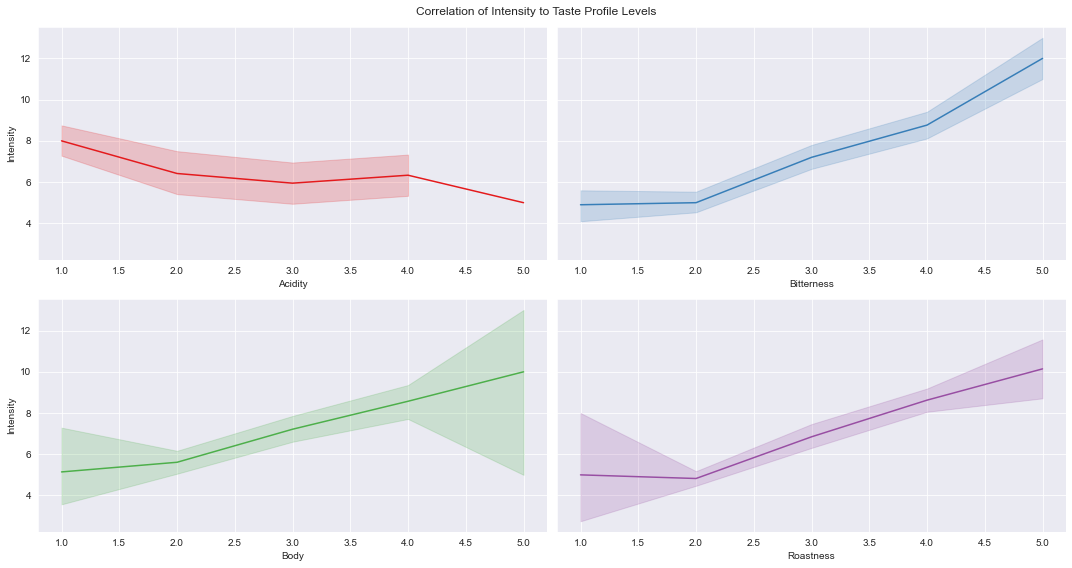

In [131]:
# Line plots to identify correlation of intensity to taste profile levels
def charts_intensityTasteProfileLevels(dataframe, columns, target, title, palette):
    fig, axes = plt.subplots(2, 2, figsize=(15,8), sharey='all');
    fig.suptitle(title);
    sns.lineplot(ax=axes[0, 0], data=dataframe, x=columns[0], y=target, color=palette[0]);
    sns.lineplot(ax=axes[0, 1], data=dataframe, x=columns[1], y=target, color=palette[1]);
    sns.lineplot(ax=axes[1, 0], data=dataframe, x=columns[2], y=target, color=palette[2]);
    sns.lineplot(ax=axes[1, 1], data=dataframe, x=columns[3], y=target, color=palette[3]);
    plt.tight_layout();
    return axes;

charts_intensityTasteProfileLevels(
    dataframe=df, 
    columns=['Acidity','Bitterness','Body','Roastness'], 
    target='Intensity',
    title="Correlation of Intensity to Taste Profile Levels",
    palette=sns.color_palette('Set1')
)

array([[<AxesSubplot:xlabel='Milky Taste', ylabel='Intensity'>,
        <AxesSubplot:xlabel='Bitterness with Milk', ylabel='Intensity'>],
       [<AxesSubplot:xlabel='Roastiness with Milk', ylabel='Intensity'>,
        <AxesSubplot:xlabel='Creamy Texture', ylabel='Intensity'>]],
      dtype=object)

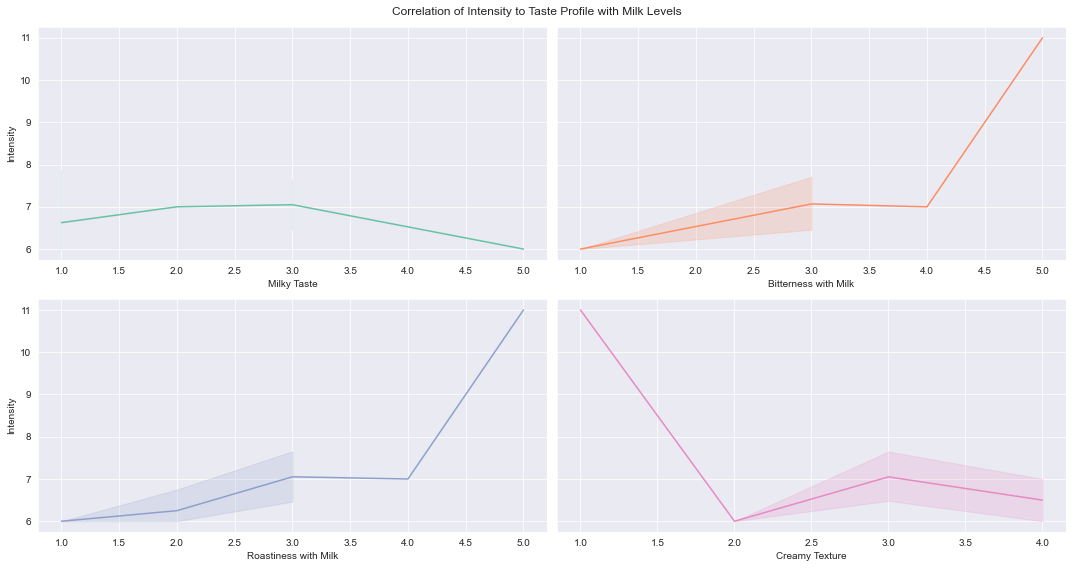

In [130]:
# Line plots to identify correlation of intensity to taste profile with milk levels
charts_intensityTasteProfileLevels(
    dataframe=df, 
    columns=['Milky Taste','Bitterness with Milk','Roastiness with Milk','Creamy Texture'], 
    target='Intensity',
    title="Correlation of Intensity to Taste Profile with Milk Levels",
    palette=sns.color_palette('Set2')
)